In [53]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [54]:
# Load your dataset (you should replace 'your_dataset.csv' with the actual dataset file path)
data = pd.read_csv('/content/Dataset_ML_Project - Sheet1.csv')

In [55]:
min = data.count().min()
min

597

In [56]:
# data.dropna().sample(min)
data.dropna(inplace=True)

In [57]:
data.count()

maths      597
science    597
english    597
total      597
predict    597
dtype: int64

In [82]:
# input_features = ['maths', 'science', 'english']
input_features = ['total']
output_label = 'predict'

data_x = data[input_features]
data_y = data[output_label]

# Normalize the input data (scaling to have mean=0 and variance=1)
scaler = StandardScaler()
data_x = scaler.fit_transform(data_x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

In [83]:
len(data_y)

597

In [85]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(1,)),  # Input layer
    keras.layers.Dense(32, activation='relu'),  # Hidden layer
    keras.layers.Dense(3, activation='softmax')  # Output layer (3 classes for 'predict')
])


In [86]:
data_y.unique()

array([2, 0, 1])

In [87]:
print(model.input_shape)

(None, 1)


In [88]:
print(X_train.shape)

(477, 3)


In [89]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
15/15 - 1s - loss: 1.0366 - accuracy: 0.6080 - 1s/epoch - 78ms/step
Epoch 2/100
15/15 - 0s - loss: 0.8546 - accuracy: 0.7862 - 41ms/epoch - 3ms/step
Epoch 3/100
15/15 - 0s - loss: 0.7022 - accuracy: 0.7778 - 44ms/epoch - 3ms/step
Epoch 4/100
15/15 - 0s - loss: 0.5730 - accuracy: 0.7987 - 48ms/epoch - 3ms/step
Epoch 5/100
15/15 - 0s - loss: 0.4768 - accuracy: 0.8281 - 42ms/epoch - 3ms/step
Epoch 6/100
15/15 - 0s - loss: 0.3979 - accuracy: 0.8868 - 41ms/epoch - 3ms/step
Epoch 7/100
15/15 - 0s - loss: 0.3276 - accuracy: 0.9413 - 42ms/epoch - 3ms/step
Epoch 8/100
15/15 - 0s - loss: 0.2578 - accuracy: 0.9686 - 45ms/epoch - 3ms/step
Epoch 9/100
15/15 - 0s - loss: 0.1976 - accuracy: 0.9916 - 41ms/epoch - 3ms/step
Epoch 10/100
15/15 - 0s - loss: 0.1504 - accuracy: 1.0000 - 41ms/epoch - 3ms/step
Epoch 11/100
15/15 - 0s - loss: 0.1154 - accuracy: 1.0000 - 41ms/epoch - 3ms/step
Epoch 12/100
15/15 - 0s - loss: 0.0898 - accuracy: 1.0000 - 40ms/epoch - 3ms/step
Epoch 13/100
15/15 - 0s - 

In [90]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

In [91]:
# Generate predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=-1)

# Generate a confusion matrix
confusion = confusion_matrix(y_test, y_pred_classes)

# Generate a classification report
class_report = classification_report(y_test, y_pred_classes)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred_classes)

# Print confusion matrix, classification report, and accuracy
print("Confusion Matrix:\n", confusion)
print("\nClassification Report:\n", class_report)
print("\nAccuracy Score:", accuracy)

4/4 [==============================] - 0s 3ms/step
Confusion Matrix:
 [[44  0  0]
 [ 0 34  0]
 [ 0  0 42]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        42

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120


Accuracy Score: 1.0


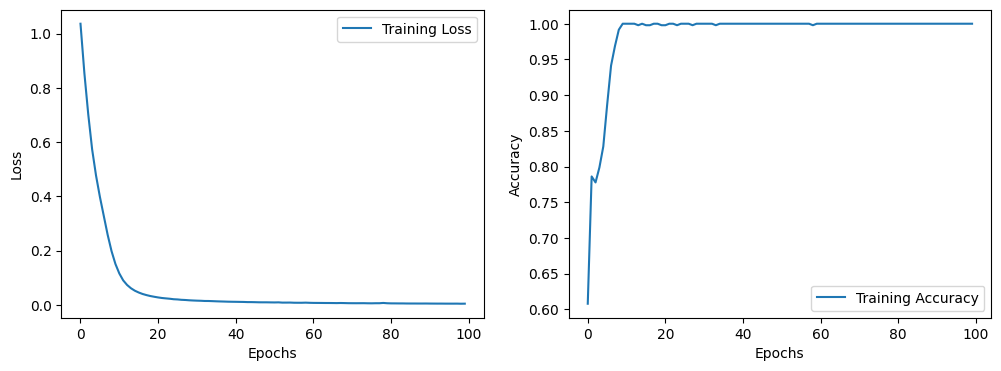

In [92]:
#  Plot training loss and accuracy over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Machine Learning Algorithm

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your CSV file into a DataFrame
data = pd.read_csv('/content/Dataset_ML_Project - Sheet1.csv')

data.dropna(inplace=True)

# Define input features and output label
input_features = ['maths', 'science', 'english']
output_label = 'predict'

X = data[input_features]
y = data[output_label]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Create and train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print evaluation results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", report)


Accuracy: 1.0

Confusion Matrix:
 [[35  0  0]
 [ 0 34  0]
 [ 0  0 51]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        51

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [94]:
from sklearn.tree import DecisionTreeClassifier

# Create and train a Random Forest classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print evaluation results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", report)

Accuracy: 0.9916666666666667

Confusion Matrix:
 [[34  1  0]
 [ 0 34  0]
 [ 0  0 51]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.97      1.00      0.99        34
           2       1.00      1.00      1.00        51

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



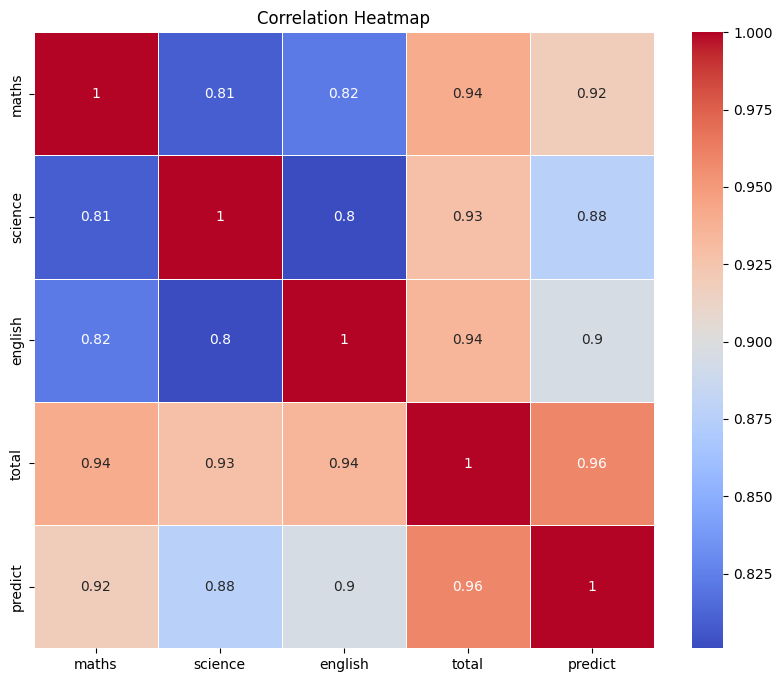

In [70]:
import seaborn as sns
# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [71]:
# import joblib

# # Assuming 'clf' is your trained Decision Tree classifier
# joblib.dump(clf, 'decision_tree_model.pkl')

In [72]:
# # Collect input values from the user
# input_maths = float(input("Enter maths score: "))
# input_science = float(input("Enter science score: "))
# input_english = float(input("Enter english score: "))

# # Calculate the total
# total = input_maths + input_science + input_english

# # Create an input array
# input_data = np.array([[input_maths, input_science, input_english]])

# # Load the scaler used during training
# scaler = StandardScaler()
# scaler.fit(data[input_features])

# # Normalize the input data
# input_data = scaler.transform(input_data)

# # Load your trained model
# model = joblib.load('/content/decision_tree_model.pkl')

# # Make predictions
# predicted_class = model.predict(input_data)

# # Display the total, percentage, and predicted class
# print("Total Score:", total)
# percentage = total / (100 * len(input_features))
# print("Percentage:", percentage * 100, "%")
# print("Predicted Class:", predicted_class[0])

In [104]:
import pandas as pd

# Collect the input data for testing
new_data = pd.DataFrame({'maths': [85, 90, 78], 'science': [92, 88, 75], 'english': [88, 80, 85]})

# Use the trained Random Forest classifier to make predictions
new_predictions = clf.predict(new_data)

# # Interpret the predictions
# for i, prediction in enumerate(new_predictions):
#     if prediction == 1:
#         print(f"Data point {i+1}: The model predicts 'Yes'")
#     else:
#         print(f"Data point {i+1}: The model predicts 'No'")

print(prediction)


2


In [77]:
import pandas as pd

# Collect the input data for testing
new_data = pd.DataFrame({'maths': [85, 90, 78], 'science': [92, 88, 75], 'english': [88, 80, 85]})

# Use the trained Random Forest classifier to make predictions
new_predictions = clf.predict(new_data)

# Interpret the predictions
for i, prediction in enumerate(new_predictions):
    if prediction == 1:
        print(f"Data point {i+1}: The model predicts 'Yes'")
    else:
        print(f"Data point {i+1}: The model predicts 'No'")

Data point 1: The model predicts 'No'
Data point 2: The model predicts 'No'
Data point 3: The model predicts 'No'


In [74]:
import joblib

# Save the trained model to a file
model_filename = 'random_forest_model.pkl'
joblib.dump(clf, model_filename)


['random_forest_model.pkl']

In [81]:
import pandas as pd
import joblib

# Load the saved model
loaded_model = joblib.load('random_forest_model.pkl')

# Collect the input data for testing
new_data = pd.DataFrame({'maths': [0, 90, 78], 'science': [0, 88, 75], 'english': [0, 80, 85]})

# Use the loaded model to make predictions
new_predictions = loaded_model.predict(new_data)

# Interpret the predictions
for i, prediction in enumerate(new_predictions):
    if prediction == 1:
        print(f"Data point {i+1}: The model predicts 'Yes'")
    else:
        print(f"Data point {i+1}: The model predicts 'No'")
print(new_predictions)

Data point 1: The model predicts 'No'
Data point 2: The model predicts 'No'
Data point 3: The model predicts 'No'
[0 2 2]
